In [5]:
###Importing Libraries
import pandas as pd
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import plotly.graph_objects as go
style.use('ggplot')

In [6]:
start=dt.datetime(2020,1,1)
end=dt.datetime.now()

In [ ]:
###This is a tiingo key you will find this in the tiingo documentation
key='*********************************'

In [ ]:
###Read the Data
df=web.get_data_tiingo(['AAPL'],api_key=key)

In [8]:
df.head()

,symbol,close,high,low,open,volume
date,,,,,,
2016-07-05 00:00:00+00:00,AAPL,94.99,95.40,94.46,95.39,27705210
2016-07-06 00:00:00+00:00,AAPL,95.53,95.66,94.37,94.60,30949090
2016-07-07 00:00:00+00:00,AAPL,95.94,96.50,95.62,95.70,25139558
2016-07-08 00:00:00+00:00,AAPL,96.68,96.89,96.05,96.49,28912103
2016-07-11 00:00:00+00:00,AAPL,96.98,97.65,96.73,96.75,23794945


In [10]:
df.shape

(1259, 6)

In [ ]:
###Dropping the unnecessary Columns
df.drop(['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor','symbol'],axis=1,inplace=True)

In [ ]:
### Converting to a csv file
df.to_csv('data.csv')

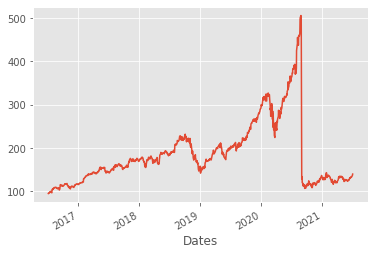

In [11]:
### Normal Plotting
df['close'].plot()
plt.xlabel("Dates")
plt.show()

In [ ]:
df=pd.read_csv('data.csv',parse_dates=True,index_col=1)

In [ ]:
df.head()

,symbol,close,high,low,open,volume
date,,,,,,
2016-07-05 00:00:00+00:00,AAPL,94.99,95.40,94.46,95.39,27705210
2016-07-06 00:00:00+00:00,AAPL,95.53,95.66,94.37,94.60,30949090
2016-07-07 00:00:00+00:00,AAPL,95.94,96.50,95.62,95.70,25139558
2016-07-08 00:00:00+00:00,AAPL,96.68,96.89,96.05,96.49,28912103
2016-07-11 00:00:00+00:00,AAPL,96.98,97.65,96.73,96.75,23794945


In [12]:
### Claculating the 100 days Moving Average
df['100ma']=df['close'].rolling(window=100,min_periods=0).mean()

<BarContainer object of 1259 artists>

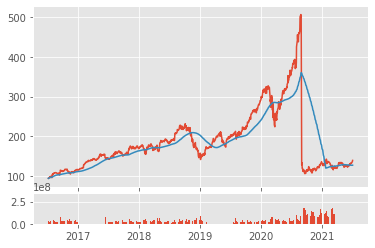

In [13]:
ax1= plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1, sharex=ax1)

ax1.plot(df.index,df['close'])
ax1.plot(df.index,df['100ma'])

ax2.bar(df.index,df['volume'])

In [14]:
### Creating an OHLC dataframe
df_oh=df['close'].resample('10D').ohlc()

In [15]:
df_oh.head()

,open,high,low,close
date,,,,
2016-07-05 00:00:00+00:00,94.99,98.79,94.99,98.79
2016-07-15 00:00:00+00:00,98.78,99.96,98.66,98.66
2016-07-25 00:00:00+00:00,97.34,106.05,96.67,105.79
2016-08-04 00:00:00+00:00,105.87,108.81,105.87,108.18
2016-08-14 00:00:00+00:00,109.48,109.48,108.51,108.85


In [18]:
### Creating a candlestick Graph
candlestick = go.Candlestick(
                            x=df_oh.index,
                            high=df_oh['high'],
                            low=df_oh['low'],
                            open=df_oh['open'],
                            close=df_oh['close']
                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width=800, height=800,
    title="Apple, March - 2020",
    yaxis_title='AAPL Stock'
)

fig.show()